In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
price_and_demand = pd.read_csv("price_and_demand.csv")
price_and_demand

,REGION,SETTLEMENTDATE,TOTALDEMAND,RRP,PERIODTYPE
0,VIC1,1/11/2022 0:30,4178.18,8.94,TRADE
1,VIC1,1/11/2022 1:00,4086.02,0.14,TRADE
2,VIC1,1/11/2022 1:30,4033.37,0.02,TRADE
3,VIC1,1/11/2022 2:00,3985.64,0.00,TRADE
4,VIC1,1/11/2022 2:30,3885.64,0.02,TRADE
...,...,...,...,...,...
8347,VIC1,23/04/2023 22:00,4717.55,84.09,TRADE
8348,VIC1,23/04/2023 22:30,4520.39,81.25,TRADE
8349,VIC1,23/04/2023 23:00,4472.49,93.97,TRADE
8350,VIC1,23/04/2023 23:30,4621.36,83.96,TRADE


In [3]:
# Check datatype of the dataframe
price_and_demand.dtypes

REGION             object
SETTLEMENTDATE     object
TOTALDEMAND       float64
RRP               float64
PERIODTYPE         object
dtype: object

In [4]:
# check if there is any mising data
price_and_demand.isna().sum()

REGION            0
SETTLEMENTDATE    0
TOTALDEMAND       0
RRP               0
PERIODTYPE        0
dtype: int64

In [5]:
# Convert "SETTLEMENTDATE" column to datetime
price_and_demand["SETTLEMENTDATE"] = pd.to_datetime(price_and_demand["SETTLEMENTDATE"], format="%d/%m/%Y %H:%M")

In [6]:
# Extract date from "SETTLEMENTDATE" and create a new 'Date' column
price_and_demand['Date'] = price_and_demand['SETTLEMENTDATE'].dt.date

In [7]:
# Sampling 20 examples
price_and_demand.sample(20)

,REGION,SETTLEMENTDATE,TOTALDEMAND,RRP,PERIODTYPE,Date
7947,VIC1,2023-04-15 14:00:00,4279.15,65.34,TRADE,2023-04-15
7420,VIC1,2023-04-04 14:30:00,4000.93,86.99,TRADE,2023-04-04
1631,VIC1,2022-12-05 00:00:00,4561.65,120.86,TRADE,2022-12-05
3556,VIC1,2023-01-14 02:30:00,4234.63,95.99,TRADE,2023-01-14
7103,VIC1,2023-03-29 00:00:00,4311.55,112.45,TRADE,2023-03-29
7918,VIC1,2023-04-14 23:30:00,4481.61,8.94,TRADE,2023-04-14
282,VIC1,2022-11-06 21:30:00,4441.37,92.78,TRADE,2022-11-06
7773,VIC1,2023-04-11 23:00:00,4455.26,8.94,TRADE,2023-04-11
7270,VIC1,2023-04-01 11:30:00,3801.26,-20.00,TRADE,2023-04-01
81,VIC1,2022-11-02 17:00:00,5805.35,59.99,TRADE,2022-11-02


In [8]:
# Calculate maximum daily energy demand and average rrp
max_demand = price_and_demand.groupby("Date")['TOTALDEMAND'].max()
print(type(max_demand))

<class 'pandas.core.series.Series'>


In [9]:
mean_rrp = price_and_demand.groupby("Date")['RRP'].mean().round(2)
mean_rrp

Date
2022-11-01     -3.76
2022-11-02     -2.52
2022-11-03     63.21
2022-11-04    110.94
2022-11-05     72.96
               ...  
2023-04-20    130.71
2023-04-21    131.46
2023-04-22     80.39
2023-04-23     63.21
2023-04-24     63.77
Name: RRP, Length: 175, dtype: float64

In [10]:
# Importing Weather Dataset
weather = pd.read_csv("weather.csv", encoding='latin-1',dayfirst = True)
weather

,Location,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,"Melbourne (Olympic Park), Victoria",1/11/2022,8.5,13.3,3.0,NaN,NaN,SW,44.0,11:36,...,NaN,NW,13,991.3,13.2,59.0,NaN,WNW,11.0,991.5
1,"Melbourne (Olympic Park), Victoria",2/11/2022,6.9,15.7,2.8,NaN,NaN,SSW,43.0,11:33,...,NaN,W,9,1006.7,15.1,54.0,NaN,SSW,13.0,1008.4
2,"Melbourne (Olympic Park), Victoria",3/11/2022,9.1,15.4,0.4,NaN,NaN,SSW,31.0,8:07,...,NaN,SSW,9,1019.2,13.8,67.0,NaN,SSW,9.0,1021.3
3,"Melbourne (Olympic Park), Victoria",4/11/2022,10.2,17.8,0.2,NaN,NaN,S,24.0,14:50,...,NaN,WSW,6,1028.1,16.9,56.0,NaN,SW,9.0,1026.6
4,"Melbourne (Olympic Park), Victoria",5/11/2022,11.8,22.7,0.0,NaN,NaN,N,31.0,11:58,...,NaN,N,9,1026.3,18.8,65.0,NaN,SW,11.0,1023.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,"Melbourne (Olympic Park), Victoria",20/04/2023,7.8,18.5,0.0,NaN,NaN,SSW,17.0,12:47,...,NaN,NNE,7,1026.8,17.5,58.0,NaN,SW,4.0,1025.5
171,"Melbourne (Olympic Park), Victoria",21/04/2023,11.3,19.0,0.0,NaN,NaN,SSW,13.0,10:48,...,NaN,NE,6,1030.5,18.6,64.0,NaN,SSE,2.0,1029.2
172,"Melbourne (Olympic Park), Victoria",22/04/2023,14.6,19.2,0.0,NaN,NaN,SSW,22.0,16:09,...,NaN,SW,6,1031.9,18.8,64.0,NaN,SSW,11.0,1029.7
173,"Melbourne (Olympic Park), Victoria",23/04/2023,14.8,19.0,0.0,NaN,NaN,SSW,26.0,15:45,...,NaN,SSE,7,1034.4,17.8,71.0,NaN,SSW,13.0,1032.4


In [11]:
weather.dtypes

Location                              object
Date                                  object
Minimum temperature (°C)             float64
Maximum temperature (°C)             float64
Rainfall (mm)                        float64
Evaporation (mm)                     float64
Sunshine (hours)                     float64
Direction of maximum wind gust        object
Speed of maximum wind gust (km/h)    float64
Time of maximum wind gust             object
9am Temperature (°C)                 float64
9am relative humidity (%)              int64
9am cloud amount (oktas)             float64
9am wind direction                    object
9am wind speed (km/h)                 object
9am MSL pressure (hPa)               float64
3pm Temperature (°C)                 float64
3pm relative humidity (%)            float64
3pm cloud amount (oktas)             float64
3pm wind direction                    object
3pm wind speed (km/h)                float64
3pm MSL pressure (hPa)               float64
dtype: obj

In [12]:
#Removing entirely empty columns
weather = weather.dropna(axis = 1, how = 'all')
weather

,Location,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,"Melbourne (Olympic Park), Victoria",1/11/2022,8.5,13.3,3.0,SW,44.0,11:36,12.0,64,NW,13,991.3,13.2,59.0,WNW,11.0,991.5
1,"Melbourne (Olympic Park), Victoria",2/11/2022,6.9,15.7,2.8,SSW,43.0,11:33,11.0,65,W,9,1006.7,15.1,54.0,SSW,13.0,1008.4
2,"Melbourne (Olympic Park), Victoria",3/11/2022,9.1,15.4,0.4,SSW,31.0,8:07,11.5,70,SSW,9,1019.2,13.8,67.0,SSW,9.0,1021.3
3,"Melbourne (Olympic Park), Victoria",4/11/2022,10.2,17.8,0.2,S,24.0,14:50,12.3,84,WSW,6,1028.1,16.9,56.0,SW,9.0,1026.6
4,"Melbourne (Olympic Park), Victoria",5/11/2022,11.8,22.7,0.0,N,31.0,11:58,14.0,78,N,9,1026.3,18.8,65.0,SW,11.0,1023.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,"Melbourne (Olympic Park), Victoria",20/04/2023,7.8,18.5,0.0,SSW,17.0,12:47,12.4,72,NNE,7,1026.8,17.5,58.0,SW,4.0,1025.5
171,"Melbourne (Olympic Park), Victoria",21/04/2023,11.3,19.0,0.0,SSW,13.0,10:48,14.8,78,NE,6,1030.5,18.6,64.0,SSE,2.0,1029.2
172,"Melbourne (Olympic Park), Victoria",22/04/2023,14.6,19.2,0.0,SSW,22.0,16:09,15.2,84,SW,6,1031.9,18.8,64.0,SSW,11.0,1029.7
173,"Melbourne (Olympic Park), Victoria",23/04/2023,14.8,19.0,0.0,SSW,26.0,15:45,16.7,79,SSE,7,1034.4,17.8,71.0,SSW,13.0,1032.4


In [13]:
#Setting Date format to match
weather = weather.copy()
weather["Date"] = pd.to_datetime(weather['Date'], format="%d/%m/%Y")
weather.head()

,Location,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,"Melbourne (Olympic Park), Victoria",2022-11-01,8.5,13.3,3.0,SW,44.0,11:36,12.0,64,NW,13,991.3,13.2,59.0,WNW,11.0,991.5
1,"Melbourne (Olympic Park), Victoria",2022-11-02,6.9,15.7,2.8,SSW,43.0,11:33,11.0,65,W,9,1006.7,15.1,54.0,SSW,13.0,1008.4
2,"Melbourne (Olympic Park), Victoria",2022-11-03,9.1,15.4,0.4,SSW,31.0,8:07,11.5,70,SSW,9,1019.2,13.8,67.0,SSW,9.0,1021.3
3,"Melbourne (Olympic Park), Victoria",2022-11-04,10.2,17.8,0.2,S,24.0,14:50,12.3,84,WSW,6,1028.1,16.9,56.0,SW,9.0,1026.6
4,"Melbourne (Olympic Park), Victoria",2022-11-05,11.8,22.7,0.0,N,31.0,11:58,14.0,78,N,9,1026.3,18.8,65.0,SW,11.0,1023.2


In [14]:
#Setting Date as the ID Column
weather_dateindex = weather.set_index('Date')
weather_dateindex

,Location,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
Date,,,,,,,,,,,,,,,,,
2022-11-01,"Melbourne (Olympic Park), Victoria",8.5,13.3,3.0,SW,44.0,11:36,12.0,64,NW,13,991.3,13.2,59.0,WNW,11.0,991.5
2022-11-02,"Melbourne (Olympic Park), Victoria",6.9,15.7,2.8,SSW,43.0,11:33,11.0,65,W,9,1006.7,15.1,54.0,SSW,13.0,1008.4
2022-11-03,"Melbourne (Olympic Park), Victoria",9.1,15.4,0.4,SSW,31.0,8:07,11.5,70,SSW,9,1019.2,13.8,67.0,SSW,9.0,1021.3
2022-11-04,"Melbourne (Olympic Park), Victoria",10.2,17.8,0.2,S,24.0,14:50,12.3,84,WSW,6,1028.1,16.9,56.0,SW,9.0,1026.6
2022-11-05,"Melbourne (Olympic Park), Victoria",11.8,22.7,0.0,N,31.0,11:58,14.0,78,N,9,1026.3,18.8,65.0,SW,11.0,1023.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-20,"Melbourne (Olympic Park), Victoria",7.8,18.5,0.0,SSW,17.0,12:47,12.4,72,NNE,7,1026.8,17.5,58.0,SW,4.0,1025.5
2023-04-21,"Melbourne (Olympic Park), Victoria",11.3,19.0,0.0,SSW,13.0,10:48,14.8,78,NE,6,1030.5,18.6,64.0,SSE,2.0,1029.2
2023-04-22,"Melbourne (Olympic Park), Victoria",14.6,19.2,0.0,SSW,22.0,16:09,15.2,84,SW,6,1031.9,18.8,64.0,SSW,11.0,1029.7


In [15]:
"""Data Cleaning across entire dataframe"""
#Replacing all occurrences of 'Calm' windspeed with 0 km/h
weather_nocalm = weather_dateindex.replace("Calm",0)
weather_nocalm

,Location,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
Date,,,,,,,,,,,,,,,,,
2022-11-01,"Melbourne (Olympic Park), Victoria",8.5,13.3,3.0,SW,44.0,11:36,12.0,64,NW,13,991.3,13.2,59.0,WNW,11.0,991.5
2022-11-02,"Melbourne (Olympic Park), Victoria",6.9,15.7,2.8,SSW,43.0,11:33,11.0,65,W,9,1006.7,15.1,54.0,SSW,13.0,1008.4
2022-11-03,"Melbourne (Olympic Park), Victoria",9.1,15.4,0.4,SSW,31.0,8:07,11.5,70,SSW,9,1019.2,13.8,67.0,SSW,9.0,1021.3
2022-11-04,"Melbourne (Olympic Park), Victoria",10.2,17.8,0.2,S,24.0,14:50,12.3,84,WSW,6,1028.1,16.9,56.0,SW,9.0,1026.6
2022-11-05,"Melbourne (Olympic Park), Victoria",11.8,22.7,0.0,N,31.0,11:58,14.0,78,N,9,1026.3,18.8,65.0,SW,11.0,1023.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-20,"Melbourne (Olympic Park), Victoria",7.8,18.5,0.0,SSW,17.0,12:47,12.4,72,NNE,7,1026.8,17.5,58.0,SW,4.0,1025.5
2023-04-21,"Melbourne (Olympic Park), Victoria",11.3,19.0,0.0,SSW,13.0,10:48,14.8,78,NE,6,1030.5,18.6,64.0,SSE,2.0,1029.2
2023-04-22,"Melbourne (Olympic Park), Victoria",14.6,19.2,0.0,SSW,22.0,16:09,15.2,84,SW,6,1031.9,18.8,64.0,SSW,11.0,1029.7


In [16]:
#Replacing all wind directions with True Bearing quantities
weather_bearings = weather_nocalm.replace(['N','NNE','NE','ENE','E','ESE','SE','SSE','S','SSW','SW','WSW','W','WNW','NW','NNW'],
                                          [0,22.5,45,67.5,90,112.5,135,157.5,180,202.5,225,247.5,270,292.5,315,337.5])
#Renaming Columns with True Bearing Units
weather_bearings.rename(columns = {'Direction of maximum wind gust ':'Direction of maximum wind gust (°T)', '9am wind direction':'9am wind direction (°T)','3pm wind direction':'3pm wind direction (°T)'},inplace = True)

#Data Cleaning Complete
processed_data = weather_bearings

processed_data

,Location,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Direction of maximum wind gust (°T),Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),9am wind direction (°T),9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm wind direction (°T),3pm wind speed (km/h),3pm MSL pressure (hPa)
Date,,,,,,,,,,,,,,,,,
2022-11-01,"Melbourne (Olympic Park), Victoria",8.5,13.3,3.0,225.0,44.0,11:36,12.0,64,315,13,991.3,13.2,59.0,292.5,11.0,991.5
2022-11-02,"Melbourne (Olympic Park), Victoria",6.9,15.7,2.8,202.5,43.0,11:33,11.0,65,270,9,1006.7,15.1,54.0,202.5,13.0,1008.4
2022-11-03,"Melbourne (Olympic Park), Victoria",9.1,15.4,0.4,202.5,31.0,8:07,11.5,70,202.5,9,1019.2,13.8,67.0,202.5,9.0,1021.3
2022-11-04,"Melbourne (Olympic Park), Victoria",10.2,17.8,0.2,180.0,24.0,14:50,12.3,84,247.5,6,1028.1,16.9,56.0,225.0,9.0,1026.6
2022-11-05,"Melbourne (Olympic Park), Victoria",11.8,22.7,0.0,0.0,31.0,11:58,14.0,78,0,9,1026.3,18.8,65.0,225.0,11.0,1023.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-20,"Melbourne (Olympic Park), Victoria",7.8,18.5,0.0,202.5,17.0,12:47,12.4,72,22.5,7,1026.8,17.5,58.0,225.0,4.0,1025.5
2023-04-21,"Melbourne (Olympic Park), Victoria",11.3,19.0,0.0,202.5,13.0,10:48,14.8,78,45,6,1030.5,18.6,64.0,157.5,2.0,1029.2
2023-04-22,"Melbourne (Olympic Park), Victoria",14.6,19.2,0.0,202.5,22.0,16:09,15.2,84,225,6,1031.9,18.8,64.0,202.5,11.0,1029.7


In [17]:
#Selecting key features based on 'expert' insight and desired focus variables
selected_features = ["Minimum temperature (°C)", "Maximum temperature (°C)", "Rainfall (mm)","Speed of maximum wind gust (km/h)","9am relative humidity (%)","3pm relative humidity (%)", "9am wind speed (km/h)","3pm wind speed (km/h)", "9am MSL pressure (hPa)", "3pm MSL pressure (hPa)"]
# selected_features = ["Maximum temperature (°C)", "3pm relative humidity (%)"]
selected_features

selected_data = processed_data[selected_features]

#Checking for missing values across selected features
missing_value = processed_data[selected_features].isnull()
missing_value

#Removing data points with missing selected features
selected_data = processed_data[selected_features].dropna()
predictor_data = processed_data[selected_features].dropna()
predictor_data

,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Speed of maximum wind gust (km/h),9am relative humidity (%),3pm relative humidity (%),9am wind speed (km/h),3pm wind speed (km/h),9am MSL pressure (hPa),3pm MSL pressure (hPa)
Date,,,,,,,,,,
2022-11-01,8.5,13.3,3.0,44.0,64,59.0,13,11.0,991.3,991.5
2022-11-02,6.9,15.7,2.8,43.0,65,54.0,9,13.0,1006.7,1008.4
2022-11-03,9.1,15.4,0.4,31.0,70,67.0,9,9.0,1019.2,1021.3
2022-11-04,10.2,17.8,0.2,24.0,84,56.0,6,9.0,1028.1,1026.6
2022-11-05,11.8,22.7,0.0,31.0,78,65.0,9,11.0,1026.3,1023.2
...,...,...,...,...,...,...,...,...,...,...
2023-04-19,14.4,17.5,1.2,28.0,66,53.0,9,9.0,1022.0,1022.1
2023-04-20,7.8,18.5,0.0,17.0,72,58.0,7,4.0,1026.8,1025.5
2023-04-21,11.3,19.0,0.0,13.0,78,64.0,6,2.0,1030.5,1029.2


In [18]:
# Converting all data to float64
selected_data = selected_data.astype(float)
selected_data

predictor_data = predictor_data.astype(float)
predictor_data

,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Speed of maximum wind gust (km/h),9am relative humidity (%),3pm relative humidity (%),9am wind speed (km/h),3pm wind speed (km/h),9am MSL pressure (hPa),3pm MSL pressure (hPa)
Date,,,,,,,,,,
2022-11-01,8.5,13.3,3.0,44.0,64.0,59.0,13.0,11.0,991.3,991.5
2022-11-02,6.9,15.7,2.8,43.0,65.0,54.0,9.0,13.0,1006.7,1008.4
2022-11-03,9.1,15.4,0.4,31.0,70.0,67.0,9.0,9.0,1019.2,1021.3
2022-11-04,10.2,17.8,0.2,24.0,84.0,56.0,6.0,9.0,1028.1,1026.6
2022-11-05,11.8,22.7,0.0,31.0,78.0,65.0,9.0,11.0,1026.3,1023.2
...,...,...,...,...,...,...,...,...,...,...
2023-04-19,14.4,17.5,1.2,28.0,66.0,53.0,9.0,9.0,1022.0,1022.1
2023-04-20,7.8,18.5,0.0,17.0,72.0,58.0,7.0,4.0,1026.8,1025.5
2023-04-21,11.3,19.0,0.0,13.0,78.0,64.0,6.0,2.0,1030.5,1029.2


In [19]:
# Introducing Target Variables
selected_data["Average RRP"] = mean_rrp
selected_data["Maximum Energy Demand"] = max_demand
selected_data

,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Speed of maximum wind gust (km/h),9am relative humidity (%),3pm relative humidity (%),9am wind speed (km/h),3pm wind speed (km/h),9am MSL pressure (hPa),3pm MSL pressure (hPa),Average RRP,Maximum Energy Demand
Date,,,,,,,,,,,,
2022-11-01,8.5,13.3,3.0,44.0,64.0,59.0,13.0,11.0,991.3,991.5,-3.76,5627.52
2022-11-02,6.9,15.7,2.8,43.0,65.0,54.0,9.0,13.0,1006.7,1008.4,-2.52,6018.43
2022-11-03,9.1,15.4,0.4,31.0,70.0,67.0,9.0,9.0,1019.2,1021.3,63.21,6004.84
2022-11-04,10.2,17.8,0.2,24.0,84.0,56.0,6.0,9.0,1028.1,1026.6,110.94,5757.62
2022-11-05,11.8,22.7,0.0,31.0,78.0,65.0,9.0,11.0,1026.3,1023.2,72.96,4783.60
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-19,14.4,17.5,1.2,28.0,66.0,53.0,9.0,9.0,1022.0,1022.1,102.33,6042.88
2023-04-20,7.8,18.5,0.0,17.0,72.0,58.0,7.0,4.0,1026.8,1025.5,130.71,6084.21
2023-04-21,11.3,19.0,0.0,13.0,78.0,64.0,6.0,2.0,1030.5,1029.2,131.46,5903.60


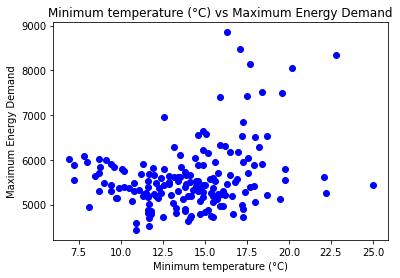

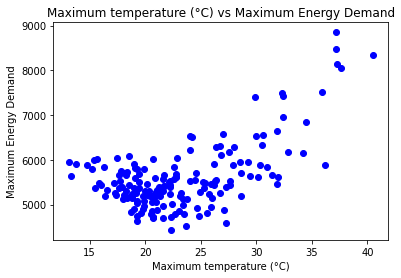

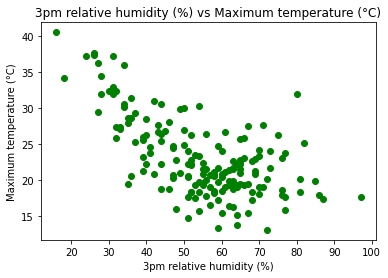

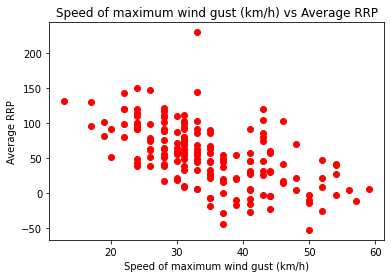

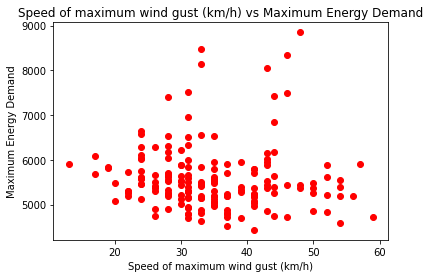

In [20]:
plot_x1 = "Minimum temperature (°C)"
plot_y1 = "Maximum Energy Demand"

plt.scatter(selected_data[plot_x1], selected_data[plot_y1], label="Data Points", color="blue")
plt.xlabel(plot_x1)
plt.ylabel(plot_y1)
plt.title(''.join([plot_x1," vs ",plot_y1]))
plt.show()

plot_x2 = "Maximum temperature (°C)"
plot_y2 = "Maximum Energy Demand"

plt.scatter(selected_data[plot_x2], selected_data[plot_y2], label="Data Points", color="blue")
plt.xlabel(plot_x2)
plt.ylabel(plot_y2)
plt.title(''.join([plot_x2," vs ",plot_y2]))
plt.show()

plot_x3 = "3pm relative humidity (%)"
plot_y3 = "Maximum temperature (°C)"

plt.scatter(selected_data[plot_x3], selected_data[plot_y3], label="Data Points", color="green")
plt.xlabel(plot_x3)
plt.ylabel(plot_y3)
plt.title(''.join([plot_x3," vs ",plot_y3]))
plt.show()

plot_x5 = "Speed of maximum wind gust (km/h)"
plot_y5 = "Average RRP"

plt.scatter(selected_data[plot_x5], selected_data[plot_y5], label="Data Points", color="red")
plt.xlabel(plot_x5)
plt.ylabel(plot_y5)
plt.title(''.join([plot_x5," vs ",plot_y5]))
plt.show()

plot_x6 = "Speed of maximum wind gust (km/h)"
plot_y6 = "Maximum Energy Demand"

plt.scatter(selected_data[plot_x6], selected_data[plot_y6], label="Data Points", color="red")
plt.xlabel(plot_x6)
plt.ylabel(plot_y6)
plt.title(''.join([plot_x6," vs ",plot_y6]))
plt.show()

In [21]:
"""Modelling with Various Methodologies"""
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn import impute

In [22]:
#Library for sorting dictionary
import heapq

#Importing libraries 
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor

#Importing for Plotting Scatter Plot Legend
import matplotlib.patches as mpatches

In [23]:
nrg_corr = {}
    
#Iterating to create a dictionary with Pearson r Correlations and Selected Parameters
for column in predictor_data.columns:
    corr1 = predictor_data[column].corr(max_demand)
    nrg_corr[column] = abs(corr1)

In [24]:
#Defining Target Variable
nrg_classlabel = selected_data["Maximum Energy Demand"]
nrg_classlabel

Date
2022-11-01    5627.52
2022-11-02    6018.43
2022-11-03    6004.84
2022-11-04    5757.62
2022-11-05    4783.60
               ...   
2023-04-19    6042.88
2023-04-20    6084.21
2023-04-21    5903.60
2023-04-22    5313.61
2023-04-23    5361.47
Name: Maximum Energy Demand, Length: 174, dtype: float64

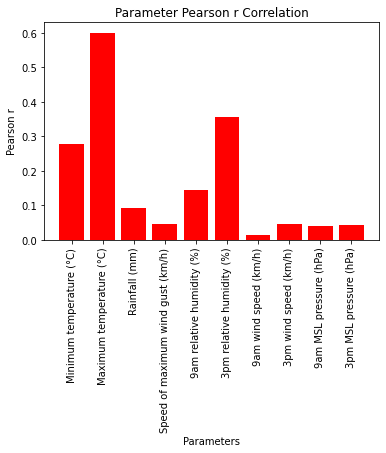

In [25]:
for column in predictor_data.columns:
        corr1 = predictor_data[column].corr(max_demand)
        nrg_corr[column] = abs(corr1)
        
plt.bar(nrg_corr.keys(),nrg_corr.values(), color = 'red')
plt.title('Parameter Pearson r Correlation')
plt.xticks(rotation='vertical')
plt.xlabel('Parameters')
plt.ylabel('Pearson r')
plt.show()

LR Ideal Paramaters: 1
Ideal Test Size: 0.4
R2: 0.42716155558021385


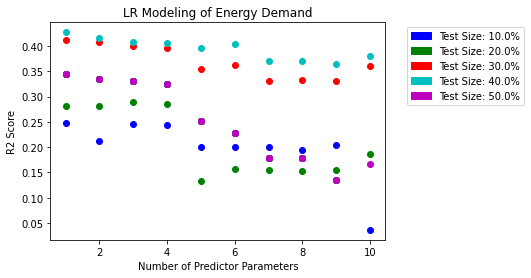

In [28]:
"""Iterating to visualise correlation between quantity of Predictor Variables, proportion of Test Size and Linear Regression R2 Score"""
nrg_lr_r2 = {}
nrg_lr_mse = {}
nrg_lr_all = {}

# test_sizes = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5]
test_sizes = [0.1,0.2,0.3,0.4,0.5]
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', '#ffc300','#2e383f','#006eb0']

for i in range(1,len(selected_features)+1):
    #Defining number of desired parameters
    desired_parameters = i

    # Finding the x parameters with the largest correlation to energy
    max_nrgcorr = heapq.nlargest(desired_parameters, nrg_corr, key=nrg_corr.get)

    # Max Correlation Predictor Variable
    sel_nrgdata = predictor_data[max_nrgcorr]
    sel_nrgdata
       
    for j in range(len(test_sizes)):    
        # Splitting data into training and test sets
        nrg_X_train, nrg_X_test, nrg_y_train, nrg_y_test = train_test_split(sel_nrgdata, nrg_classlabel, test_size = test_sizes[j], random_state = 42)

        # Preprocessing with Standardization with Mean 0, Std 1
        scaler = preprocessing.StandardScaler().fit(nrg_X_train)
        nrg_X_train = scaler.transform(nrg_X_train)
        nrg_X_test = scaler.transform(nrg_X_test)

        # Imputing Missing Data with Mean or Average Data
        imputer = impute.SimpleImputer().fit(nrg_X_train)
        nrg_X_train = imputer.transform(nrg_X_train)
        nrg_X_test = imputer.transform(nrg_X_test)

        """Linear Regression Modeling"""

        # Creating the linear regression model
        nrg_lm = linear_model.LinearRegression()

        # Training the Model
        nrg_lm.fit(nrg_X_train, nrg_y_train)

        # Making predictions
        nrg_y_predlm = nrg_lm.predict(nrg_X_test)

        # Evaluating r2 score
        nrg_lr_r2[i] = r2_score(nrg_y_test, nrg_y_predlm)
        
        # Compiling all R2 Values
        nrg_lr_all["Parameters: "+str(i)+" "+"Test Size: "+str(test_sizes[j])]= nrg_lr_r2[i] 
    
        # Evaluating Mean Square Error
        nrg_lr_mse[i] = mean_squared_error(nrg_y_test, nrg_y_predlm, squared = False)

        nrg_lr_all
        plt.scatter(nrg_lr_r2.keys(),nrg_lr_r2.values(), color = colors[j])
        plt.title('LR Modeling of Energy Demand')
        plt.xlabel('Number of Predictor Parameters')
        plt.ylabel('R2 Score')
        # Create a patch for each color
        patches = [mpatches.Patch(color=colors[j], label=f'Test Size: {100*test_sizes[j]}%') for j in range(len(test_sizes))]
        # Add a legend with the patches
        plt.legend(handles=patches,bbox_to_anchor = (1.05,1),loc='upper left')
        
# Extracting the best test size and paramater quantity
max_lr_r2 = max(nrg_lr_all.values())
best_lr_parameters = max(nrg_lr_all,key=nrg_lr_all.get)

lr_parameters = int(best_lr_parameters.split()[1])
lr_testsize = float(best_lr_parameters.split()[4])
print("LR Ideal Paramaters: " + str(lr_parameters)  + "\n" + "Ideal Test Size: " + str(lr_testsize) + "\n" + "R2: " + str(max_lr_r2))

In [29]:
"""Linear Regression Final Model"""

desired_parameters = lr_parameters

# Finding the x parameters with the largest correlation to energy
max_nrgcorr = heapq.nlargest(lr_parameters, nrg_corr, key=nrg_corr.get)

# Max Correlation Predictor Variable
sel_nrgdata = predictor_data[max_nrgcorr]
sel_nrgdata

# Final Linear Regression Model
nrg_X_train, nrg_X_test, nrg_y_train, nrg_y_test = train_test_split(sel_nrgdata, nrg_classlabel, test_size = lr_testsize, random_state = 42)

# Preprocessing with Standardization with Mean 0, Std 1
scaler = preprocessing.StandardScaler().fit(nrg_X_train)
nrg_X_train = scaler.transform(nrg_X_train)
nrg_X_test = scaler.transform(nrg_X_test)

# Imputing Missing Data with Mean or Average Data
imputer = impute.SimpleImputer().fit(nrg_X_train)
nrg_X_train = imputer.transform(nrg_X_train)
nrg_X_test = imputer.transform(nrg_X_test)

# Creating the linear regression model
nrg_lm = linear_model.LinearRegression()

# Training the Model
nrg_lm.fit(nrg_X_train, nrg_y_train)

# Making predictions
nrg_y_predlm = nrg_lm.predict(nrg_X_test)

# Evaluating r2 score
lr_r2 = r2_score(nrg_y_test, nrg_y_predlm)

# Evaluating Mean Square Error
lr_mse = mean_squared_error(nrg_y_test, nrg_y_predlm, squared = False)

print("Linear Regression Model with " + str(lr_parameters) + " Parameter(s) and " + str(lr_testsize) + " Test Size yielded:" + "\n"
"R2: " + str(lr_r2) + "\n" + "MSE: " + str(lr_mse))

Linear Regression Model with 1 Parameter(s) and 0.4 Test Size yielded:
R2: 0.42716155558021385
MSE: 526.0804932027993
